In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns

# this allows plots to appear directly in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 999999;

<IPython.core.display.Javascript object>

In [3]:
# Load data
testset = pd.read_csv("data/test.csv")

In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
testset.drop(['QuoteNumber'], axis=1, inplace=True)

In [5]:
print testset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173836 entries, 0 to 173835
Columns: 297 entries, Original_Quote_Date to GeographicField64
dtypes: float64(6), int64(263), object(28)
memory usage: 395.2+ MB
None


In [6]:
# check for duplicated rows and remove
testset.drop_duplicates(inplace=True)

print testset.shape

(173836, 297)


In [7]:
#Lets look at the columns with only one unique value.
col_ct = testset.apply(lambda x : len(np.unique(x)))

/home/ubuntu/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [8]:
print 'Features with only one unique value:\n', col_ct[col_ct==1]

Features with only one unique value:
PropertyField6        1
GeographicField10A    1
dtype: int64


In [9]:
# we can just remove these columns, they are pretty much useless
testset = testset[testset.columns.difference(col_ct[col_ct==1].index.values.tolist())]

In [10]:
print testset.shape

(173836, 295)


In [11]:
#for col in testset.columns:
    #print col
    #print testset[col].value_counts(sort=True, ascending=False, dropna=False)

In [12]:
#np.array(testset.dtypes)

In [13]:
testset['Date'] = pd.to_datetime(pd.Series(testset['Original_Quote_Date']))

# Convert Date to DayOfWeek, Month, and DayOfMonth
testset['DayOfWeek']  = testset['Date'].dt.dayofweek
testset['Month'] = testset['Date'].dt.month
testset['DayOfMonth'] = testset['Date'].dt.day
testset['Quarter'] = testset['Date'].dt.quarter
testset['WeekOfYear'] = testset['Date'].dt.weekofyear

testset.drop(['Original_Quote_Date'], axis=1, inplace=True)

In [14]:
testcolumns = testset.columns.tolist()
testcolumns

['CoverageField11A',
 'CoverageField11B',
 'CoverageField1A',
 'CoverageField1B',
 'CoverageField2A',
 'CoverageField2B',
 'CoverageField3A',
 'CoverageField3B',
 'CoverageField4A',
 'CoverageField4B',
 'CoverageField5A',
 'CoverageField5B',
 'CoverageField6A',
 'CoverageField6B',
 'CoverageField8',
 'CoverageField9',
 'Field10',
 'Field11',
 'Field12',
 'Field6',
 'Field7',
 'Field8',
 'Field9',
 'GeographicField10B',
 'GeographicField11A',
 'GeographicField11B',
 'GeographicField12A',
 'GeographicField12B',
 'GeographicField13A',
 'GeographicField13B',
 'GeographicField14A',
 'GeographicField14B',
 'GeographicField15A',
 'GeographicField15B',
 'GeographicField16A',
 'GeographicField16B',
 'GeographicField17A',
 'GeographicField17B',
 'GeographicField18A',
 'GeographicField18B',
 'GeographicField19A',
 'GeographicField19B',
 'GeographicField1A',
 'GeographicField1B',
 'GeographicField20A',
 'GeographicField20B',
 'GeographicField21A',
 'GeographicField21B',
 'GeographicField22A',
 'Ge

In [15]:
coverage_fields = [elem for elem in testcolumns if elem.startswith('CoverageField')]
#coverage_fields

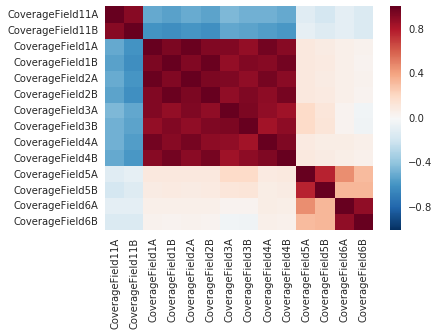

In [16]:
sns.heatmap(testset[coverage_fields].corr())

In [17]:
fields = [elem for elem in testcolumns if elem.startswith('Field')]
#fields

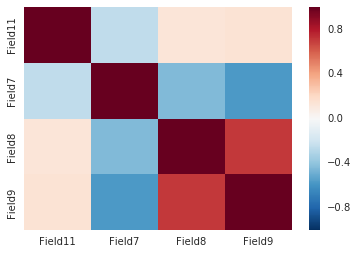

In [18]:
sns.heatmap(testset[fields].corr())

In [19]:
geographic_fields = [elem for elem in testcolumns if elem.startswith('GeographicField')]
#geographic_fields

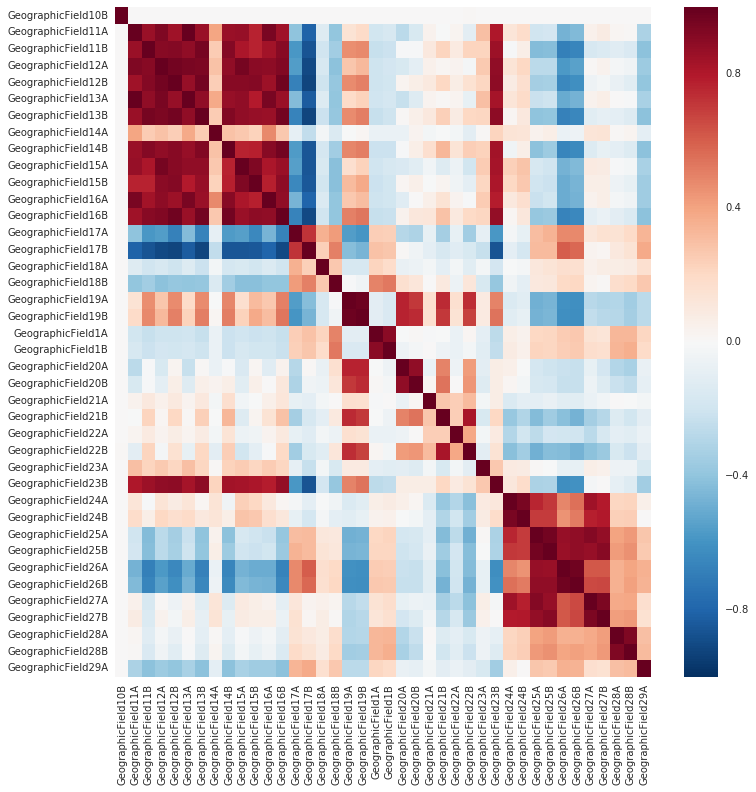

In [20]:
f, axis = plt.subplots(figsize=(12,12))
sns.heatmap(testset[geographic_fields[0:40]].corr(), ax=axis, square=False)

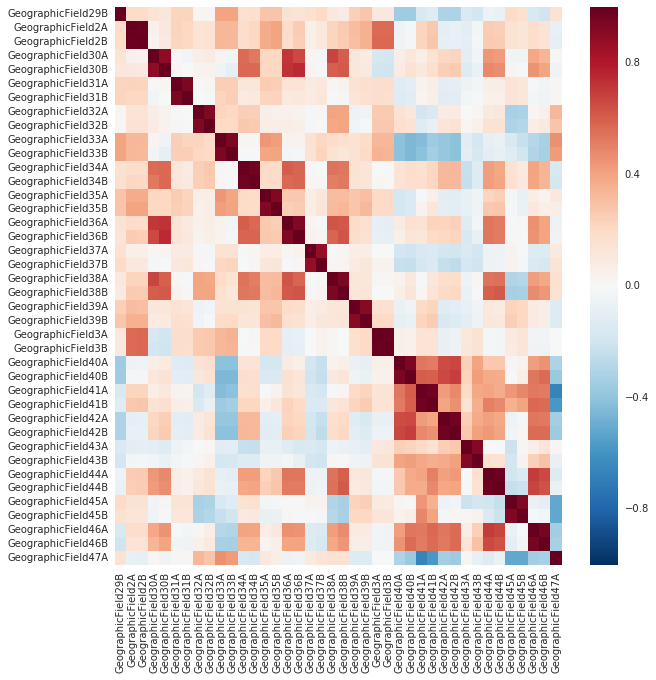

In [21]:
f, axis = plt.subplots(figsize=(10,10))
sns.heatmap(testset[geographic_fields[40:80]].corr(), ax=axis)

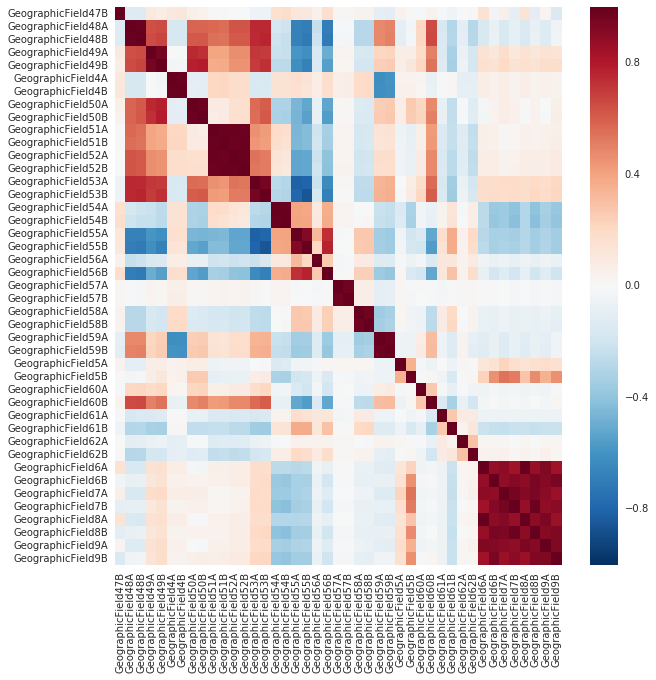

In [22]:
f, axis = plt.subplots(figsize=(10,10))
sns.heatmap(testset[geographic_fields[80:150]].corr(), ax=axis)

In [23]:
personal_fields = [elem for elem in testcolumns if elem.startswith('PersonalField')]
#personal_fields

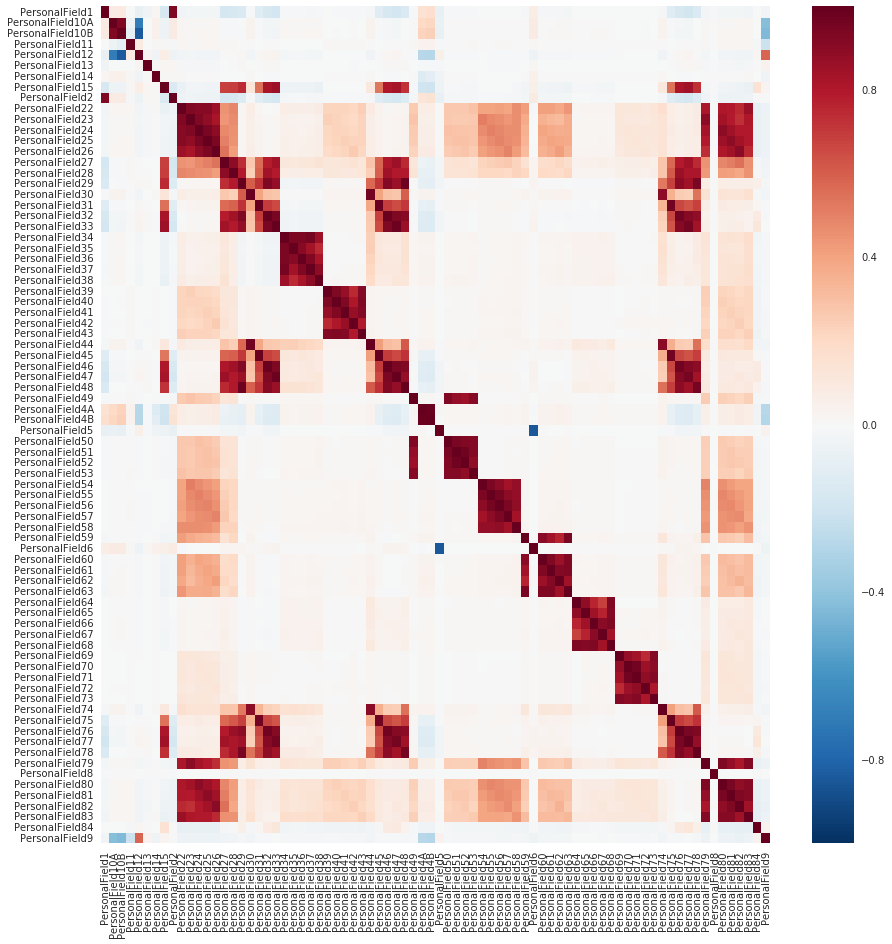

In [24]:
f, axis = plt.subplots(figsize=(15,15))
sns.heatmap(testset[personal_fields].corr(), ax=axis)

In [25]:
property_fields = [elem for elem in testcolumns if elem.startswith('PropertyField')]
#property_fields

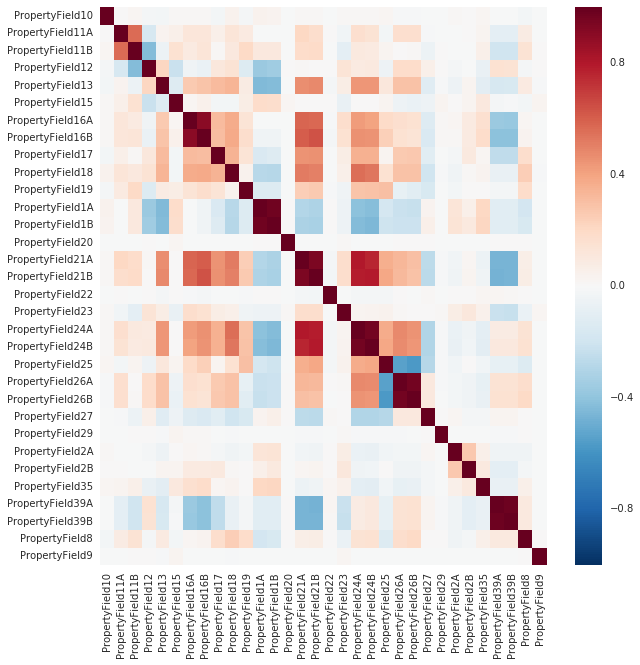

In [26]:
f, axis = plt.subplots(figsize=(10,10))
sns.heatmap(testset[property_fields].corr(), ax=axis)

In [27]:
sales_fields = [elem for elem in testcolumns if elem.startswith('SalesField')]
#sales_fields

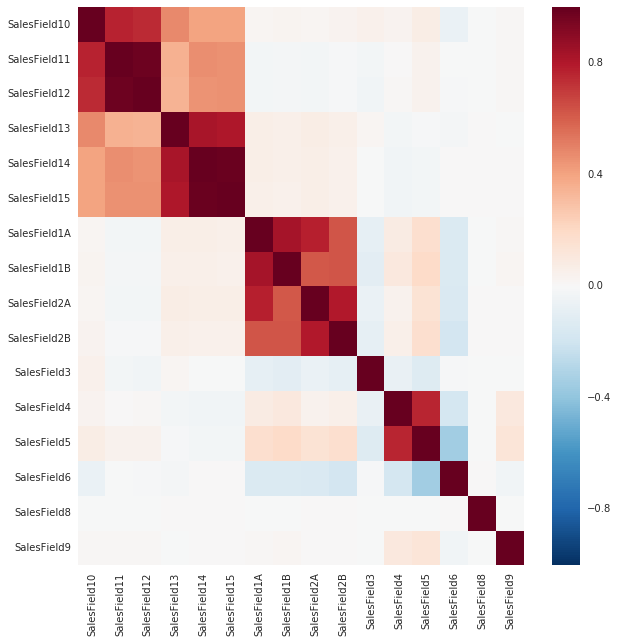

In [28]:
f, axis = plt.subplots(figsize=(10,10))
sns.heatmap(testset[sales_fields].corr(), ax=axis)

### Findings
SalesField14 and SalesField14 are highly correlated, and quick glance on the testing data excel reveals the same pattern, so we can drop one of them SalesField15

GeographicField2A, GeographicField2B and GeographicField3A, GeographicField3B and GeographicField51A, GeographicField51B and GeographicField52A, GeographicField52B and GeographicField58A, GeographicField58B and GeographicField59A, GeographicField59B are highly correlated, and quick glance on the testing data excel reveals the same pattern, so we can drop one of them from each pair.

PersonalField1, PersonalField2 are highly correlated.

PropertyField39A and PropertyField39B though appear highly correlated, but there are subtle differences in the data on the testing data excel reveals the same pattern, so we won't drop them

In [29]:
plot_columns = testset.columns.difference(['Date', 'DayOfWeek', 'Month', 'DayOfMonth', 'Quarter', 'WeekOfYear'])
print plot_columns

Index([u'CoverageField11A', u'CoverageField11B', u'CoverageField1A',
       u'CoverageField1B', u'CoverageField2A', u'CoverageField2B',
       u'CoverageField3A', u'CoverageField3B', u'CoverageField4A',
       u'CoverageField4B',
       ...
       u'SalesField1B', u'SalesField2A', u'SalesField2B', u'SalesField3',
       u'SalesField4', u'SalesField5', u'SalesField6', u'SalesField7',
       u'SalesField8', u'SalesField9'],
      dtype='object', length=294)


/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


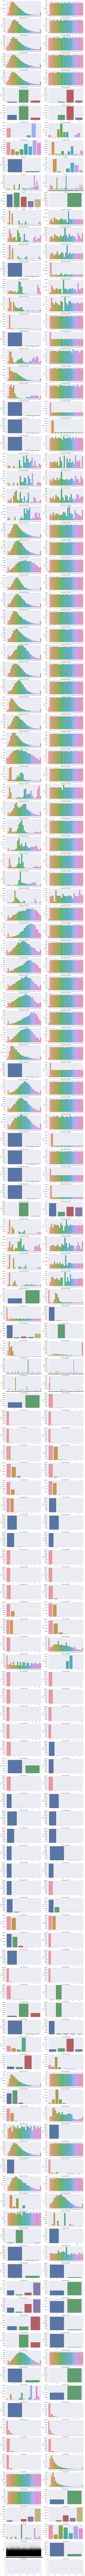

In [30]:
cols = 2
rows = np.ceil(len(plot_columns) / cols)

plt.figure()
f, ax = plt.subplots(148, 2, figsize=(15,500))
ax = ax.flatten()

for i, col in enumerate(plot_columns):
    sns.countplot(x=col, data=testset.sort_values(by=col), ax=ax[i])

### Findings
-1 appears to signify missing values

Field10, Field11, Fied7, Field9 appears to be categorical although the values are numerical

Field8 , SalesField8 are continuous

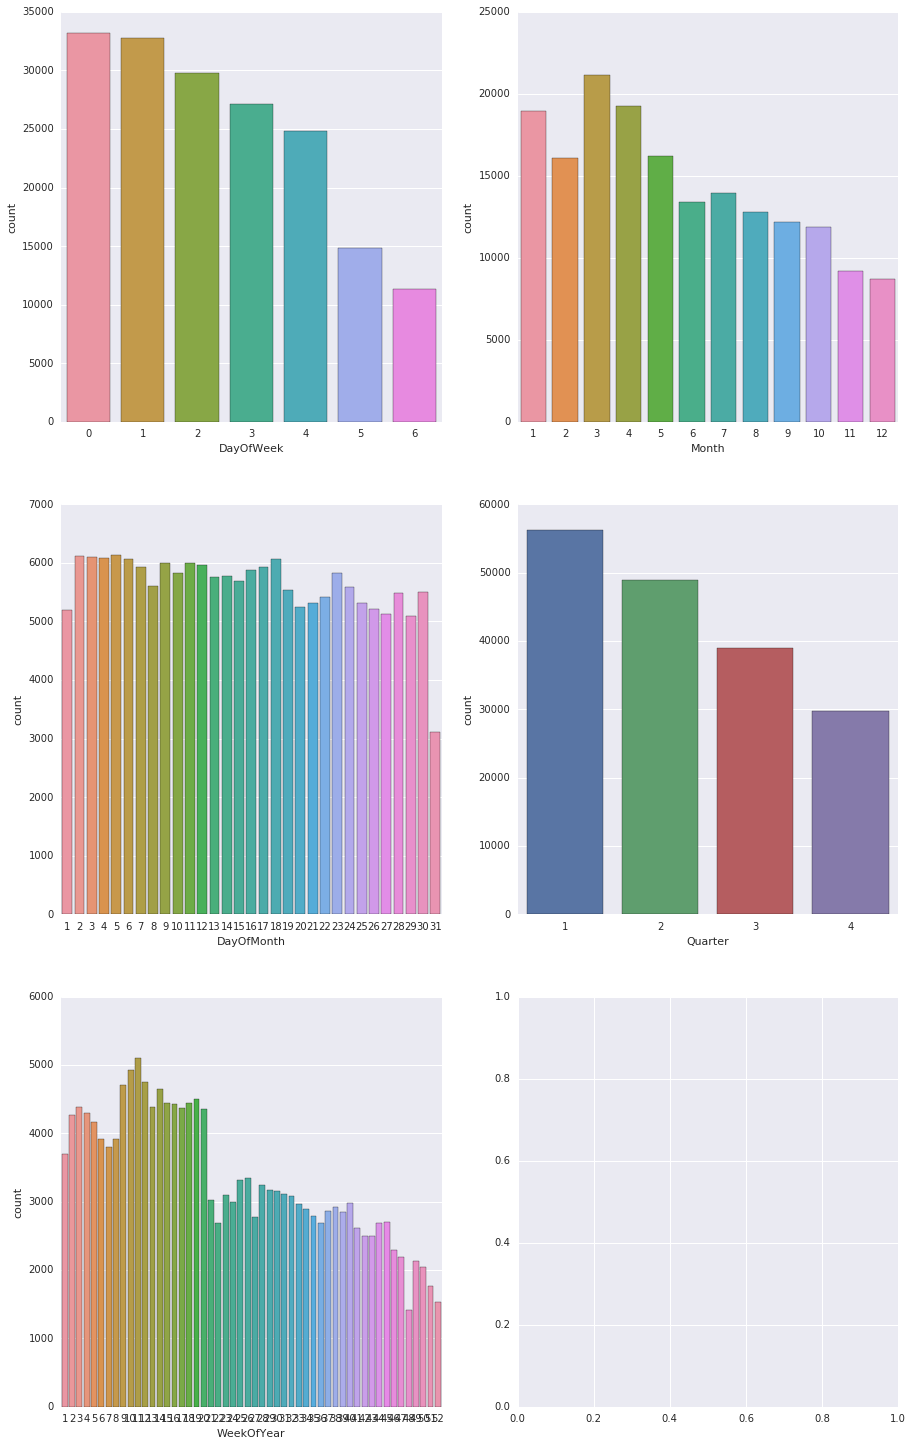

In [32]:
plt.figure()
f, ax = plt.subplots(3, 2, figsize=(15,25))
ax = ax.flatten()

for i, col in enumerate(['DayOfWeek', 'Month', 'DayOfMonth', 'Quarter', 'WeekOfYear']):
    sns.countplot(x=col, data=testset.sort_values(by=col), ax=ax[i])

### Findings
Field10, Field11, Fied7, Field9 appears to be categorical values though the values in the excel are numerical

Field8, and SalesField8 are continuous

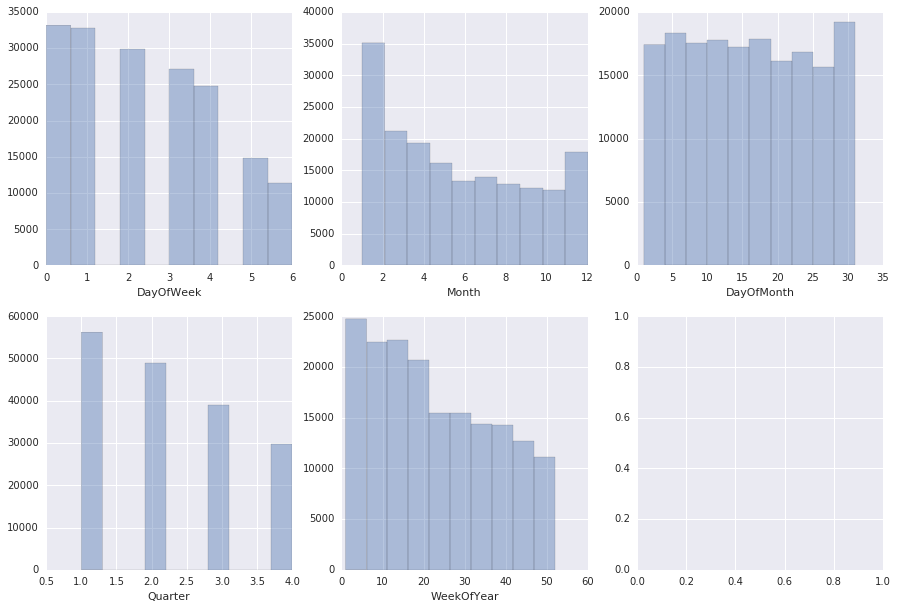

In [33]:
plt.figure()
f, ax = plt.subplots(2, 3, figsize=(15,10))
ax = ax.flatten()

for i, col in enumerate(['DayOfWeek', 'Month', 'DayOfMonth', 'Quarter', 'WeekOfYear']):
    sns.distplot(testset[col], bins=10, kde=False, ax=ax[i])

In [34]:
us_states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

state_value_count = testset['GeographicField64'].value_counts().to_dict()
state_name_count = dict()
for key in state_value_count:
    state_name_count[us_states[key]] = state_value_count[key]

{'New Jersey': 46010, 'California': 63121, 'Texas': 43320, 'Illinois': 21385}


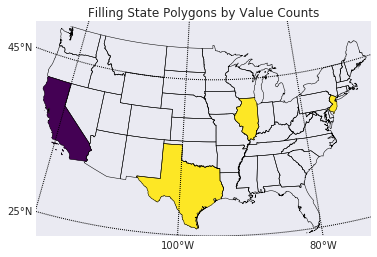

In [35]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95, height=20, width=20)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/home/ubuntu/basemap-1.0.7/examples/st99_d00','states',drawbounds=True)
# https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
print(state_name_count)

# choose a color for each state based on value count.
colors={}
statenames=[]
cmap = plt.cm.viridis# use 'viridis' colormap

vmin = min(state_name_count.values()); vmax = max(state_name_count.values()) # set range.

for shapedict in m.states_info:
    statename = shapedict['NAME']

    if statename in state_name_count:
        vcount = state_name_count[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # value counts), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((vcount-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):

    if statenames[nshape] in state_name_count:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
# draw meridians and parallels.
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
plt.title('Filling State Polygons by Value Counts')
plt.show()